ETHUSDT

In [1]:
import json
import csv
import numpy as np
import pandas as pd
from binance.client import Client
from time import sleep
from binance import ThreadedWebsocketManager

In [2]:
#Binance API測試金鑰
api_key = "你的測試api_key"
api_secret = "你的測試api_secret"

client = Client(api_key, api_secret)

#現貨測試網路
client.API_URL = 'https://testnet.binance.vision/api'

獲取ETH最新價格

In [3]:
eth_price = client.get_symbol_ticker(symbol="ETHUSDT")
print(eth_price)
print(eth_price["price"])

{'symbol': 'ETHUSDT', 'price': '900.00000000'}
900.00000000


創建一個字典來保存最新的價格數據

In [4]:
def eth_trade_history(msg):
    if msg['e'] != 'error':
        print(msg['c'])
        eth_price['last'] = msg['c']
        eth_price['bid'] = msg['b']
        eth_price['last'] = msg['a']
        eth_price['error'] = False
    else:
        eth_price['error'] = True

初始化、啟用websocket 

In [5]:
bsm = ThreadedWebsocketManager()
bsm.start()

In [6]:
bsm.start_symbol_ticker_socket(callback=eth_trade_history, symbol='ETHUSDT')

'ethusdt@ticker'

stop websocket

In [7]:
bsm.stop()

獲取價格時間點

In [8]:
timestamp = client._get_earliest_valid_timestamp('ETHUSDT', '1h')
print(timestamp)

1627635600000


請求歷史數據

In [9]:
bars = client.get_historical_klines('ETHUSDT', '1h', timestamp, limit=1000)
print(bars)

[[1627635600000, '2335.58000000', '2335.58000000', '2335.58000000', '2335.58000000', '1.00000000', 1627639199999, '2335.58000000', 1, '0.00000000', '0.00000000', '0'], [1627639200000, '2335.58000000', '2335.58000000', '2335.58000000', '2335.58000000', '0.00000000', 1627642799999, '0.00000000', 0, '0.00000000', '0.00000000', '0'], [1627642800000, '2382.51000000', '2382.51000000', '2382.51000000', '2382.51000000', '0.03459000', 1627646399999, '82.41102090', 1, '0.03459000', '82.41102090', '0'], [1627646400000, '3335.51000000', '5097.54000000', '1906.01000000', '2543.14000000', '0.35921000', 1627649999999, '948.22069170', 21, '0.29347000', '772.80490090', '0'], [1627650000000, '2543.14000000', '2543.14000000', '2543.14000000', '2543.14000000', '0.39082000', 1627653599999, '993.90997480', 8, '0.39082000', '993.90997480', '0'], [1627653600000, '2543.14000000', '2543.14000000', '1864.99000000', '1864.99000000', '0.59122000', 1627657199999, '1415.18479380', 17, '0.25410000', '639.00748200', '

回傳數據定義

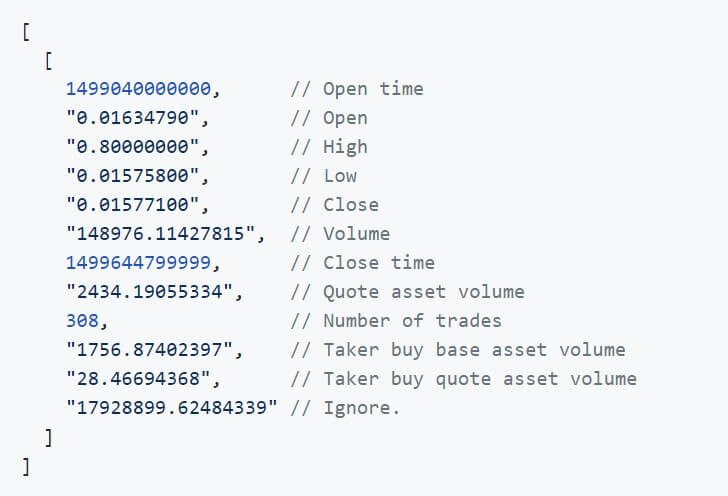

保存為 JSON 文件

In [10]:
with open('btc_bars.json', 'w') as e:
    json.dump(bars, e)

保存為 CSV 文件

In [11]:
with open('btc_bars.csv', 'w', newline='') as f:
    wr = csv.writer(f)
    for line in bars:
        wr.writerow(line)

In [12]:
with open('btc_bars2.csv', 'w') as d:
    for line in bars:
        d.write(f'{line[0]}, {line[1]}, {line[2]}, {line[3]}, {line[4]}\n')

刪除其他列，只保存了前五列的date、open、high、low、close。

In [13]:
for line in bars:
    del line[5:]

將數據傳遞到 DataFrame

In [14]:
btc_df = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'close'])
btc_df.set_index('date', inplace=True)
print(btc_df.head())

                        open           high            low          close
date                                                                     
1627635600000  2335.58000000  2335.58000000  2335.58000000  2335.58000000
1627639200000  2335.58000000  2335.58000000  2335.58000000  2335.58000000
1627642800000  2382.51000000  2382.51000000  2382.51000000  2382.51000000
1627646400000  3335.51000000  5097.54000000  1906.01000000  2543.14000000
1627650000000  2543.14000000  2543.14000000  2543.14000000  2543.14000000


In [15]:
btc_df.to_csv('btc_bars3.csv')